In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers



In [16]:

# Constants
q = 1.6e-19   # Charge (C)
m = 9.11e-31  # Mass (kg)
B = np.array([0, 0, 1])  # Magnetic field in the z-direction
dt = 1e-10    # Time step



In [17]:

# Function to simulate particle motion
def generate_trajectory(v0, steps=50):
    position = np.zeros((steps, 2))  # Only (x, y) for 2D visualization
    velocity = np.array(v0[:2])  # Consider only (vx, vy)
    
    for i in range(steps):
        force = q * np.cross(np.append(velocity, 0), B)[:2]  # Only x, y component
        acceleration = force / m
        velocity += acceleration * dt
        position[i] = position[i-1] + velocity * dt if i > 0 else velocity * dt

    return position



In [18]:

# Generate training data
num_samples = 1000  
X_train, Y_train = [], []

for _ in range(num_samples):
    v0 = np.random.uniform(-1e6, 1e6, size=(3,))  # Random velocity
    trajectory = generate_trajectory(v0, steps=50)
    X_train.append(trajectory[:30])  # First 30 points
    Y_train.append(trajectory[30:])  # Next 20 points

# Convert to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [19]:

# New Model: CNN-Based Sequential Predictor
def build_model():
    model = keras.Sequential([
        layers.Conv1D(32, kernel_size=3, activation="relu", input_shape=(30, 2)),
        layers.Conv1D(64, kernel_size=3, activation="relu"),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(40)  # 20 (x, y) points → 40 values
    ])
    model.compile(optimizer="adam", loss="mse")
    return model


In [20]:

# Build & Train Model
model = build_model()
model.fit(X_train, Y_train.reshape(num_samples, -1), epochs=10, batch_size=32)

# Test on a new trajectory
v_test = np.array([5e5, -3e5, 2e5])
trajectory_test = generate_trajectory(v_test, steps=50)
X_test = trajectory_test[:30].reshape(1, 30, 2)


Epoch 1/10
32/32 [==============================] - 0s 11ms/step - loss: nan
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: nan
Epoch 3/10
32/32 [==============================] - 0s 11ms/step - loss: nan
Epoch 4/10
32/32 [==============================] - 0s 9ms/step - loss: nan
Epoch 5/10
32/32 [==============================] - 0s 10ms/step - loss: nan
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: nan
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: nan
Epoch 8/10
32/32 [==============================] - 0s 8ms/step - loss: nan
Epoch 9/10
32/32 [==============================] - 0s 8ms/step - loss: nan
Epoch 10/10
32/32 [==============================] - 0s 8ms/step - loss: nan


In [21]:

# Predict
predicted_flat = model.predict(X_test)
predicted_position = predicted_flat.reshape(20, 2)


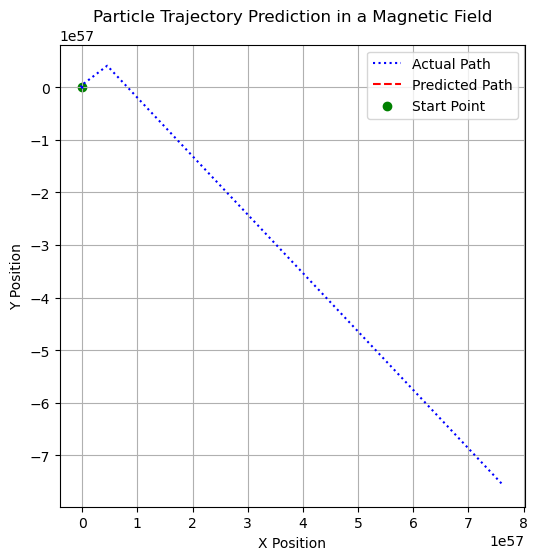

In [22]:

# Visualization
plt.figure(figsize=(6, 6))
plt.plot(trajectory_test[:, 0], trajectory_test[:, 1], label="Actual Path", linestyle="dotted", color="blue")
plt.plot(predicted_position[:, 0], predicted_position[:, 1], label="Predicted Path", linestyle="dashed", color="red")
plt.scatter(trajectory_test[0, 0], trajectory_test[0, 1], color="green", label="Start Point")
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Particle Trajectory Prediction in a Magnetic Field")
plt.grid()
plt.show()
